In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [1]:
import pandas as pd
import numpy as np
import zlib

In [2]:
import matplotlib.pyplot as plt

In [3]:
housing_data = pd.read_csv('./handson-ml2-master/datasets/housing/housing.csv')

In [6]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(housing_data, 0.2)

In [4]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32



In [21]:
def split_train_test_by_id(data, test_ratio, id_column):
         ids = data[id_column]
         in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) 
         return data.loc[~in_test_set], data.loc[in_test_set]

In [35]:
housing_data = housing_data.reset_index()

In [22]:
train_set, test_set = split_train_test_by_id(housing_data, 0.2, 'index')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [6]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=32)


In [8]:
for train_index, test_index in strat_split.split(housing_data, housing_data["income_cat"]):
        strat_train_set = housing_data.loc[train_index]
        strat_test_set = housing_data.loc[test_index]

In [9]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [9]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [11]:
housing_explore = strat_train_set.copy()

In [ ]:
housing_explore.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
housing_explore.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=housing_explore["population"]/100, label="population", figsize=(12,9),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    )
plt.legend()

In [12]:
corr_matrix = housing_explore.corr()

In [13]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684216
total_rooms           0.133887
housing_median_age    0.111445
households            0.066193
total_bedrooms        0.050271
population           -0.026870
longitude            -0.043955
latitude             -0.145869
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

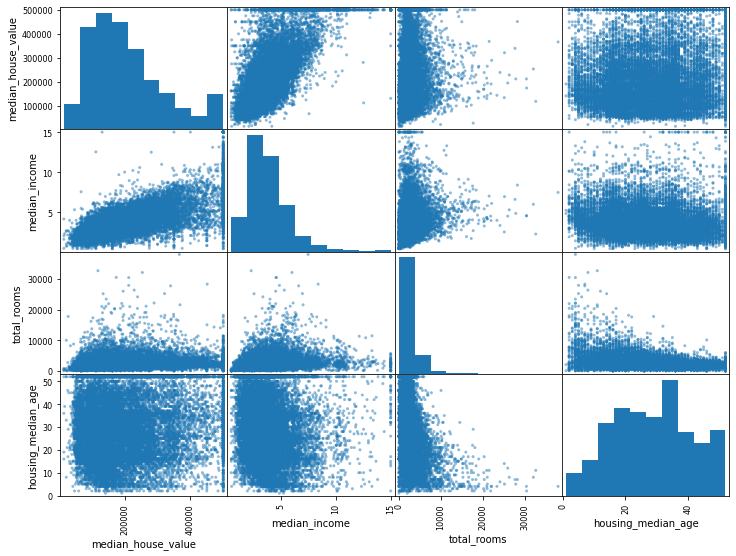

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing_explore[attributes], figsize=(12, 9))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

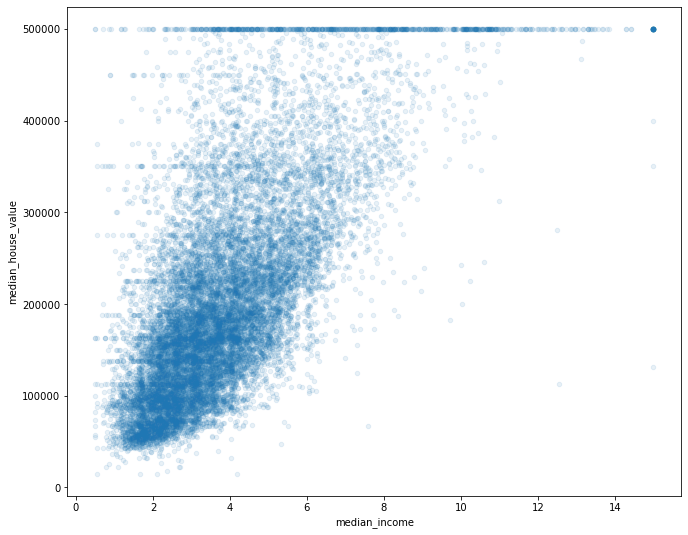

In [15]:
housing_explore.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(11, 9))

In [14]:
housing_explore["rooms_per_household"] = housing_explore["total_rooms"]/housing_explore["households"]
housing_explore["bedrooms_per_room"] = housing_explore["total_bedrooms"]/housing_explore["total_rooms"]
housing_explore["population_per_household"]=housing_explore["population"]/housing_explore["households"]

In [15]:
corr_matrix = housing_explore.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684216
rooms_per_household         0.166727
total_rooms                 0.133887
housing_median_age          0.111445
households                  0.066193
total_bedrooms              0.050271
population                 -0.026870
population_per_household   -0.033058
longitude                  -0.043955
latitude                   -0.145869
bedrooms_per_room          -0.250116
Name: median_house_value, dtype: float64

In [16]:
fresh_housing_explore = strat_train_set.drop('median_house_value', axis = 1)
fresh_housing_explore_labels = strat_train_set['median_house_value'].copy()

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [18]:
housing_num = fresh_housing_explore.drop("ocean_proximity", axis=1)

In [19]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2132.    ,  436.    , 1167.    ,
        410.    ,    3.5313])

In [24]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5242,-118.40,34.11,32.0,5578.0,753.0,1567.0,697.0,15.0001
18762,-122.25,40.66,15.0,2771.0,546.0,1423.0,505.0,3.6413
10729,-117.87,33.60,20.0,3212.0,572.0,1064.0,526.0,6.6155
17547,-121.88,37.34,52.0,867.0,232.0,1264.0,227.0,2.6312
3337,-122.51,38.76,9.0,2589.0,482.0,1050.0,374.0,4.0435


In [26]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 5242 to 20421
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16341 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [25]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2132.    ,  436.    , 1167.    ,
        410.    ,    3.5313])

In [20]:
X = imputer.transform(housing_num)


In [21]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [30]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [22]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()